In [0]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

In [0]:
#reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/fazlyrabbi77/DANGUE-Forcasting/master/dangueData.csv')

In [18]:
df.head()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DANGUE,LEVEL,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2008,1,12.993929,25.059539,78.824885,1.286636,0,1,NaN,NaN,NaN
1,2008,2,13.658286,26.383448,72.602956,0.687685,0,1,NaN,NaN,NaN
2,2008,3,20.411250,31.367558,76.903226,0.974194,0,1,NaN,NaN,NaN
3,2008,4,22.771889,34.031619,73.943810,0.980952,0,1,NaN,NaN,NaN
4,2008,5,23.945625,34.171060,77.360369,7.021198,0,1,NaN,NaN,NaN


In [0]:
#Dropping columns
df.drop(['DANGUE'], axis=1,inplace=True)

In [0]:
#dropping rows
df.drop([120,121,122,123,124,125,126,127,128,129,130,131,132,133],inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


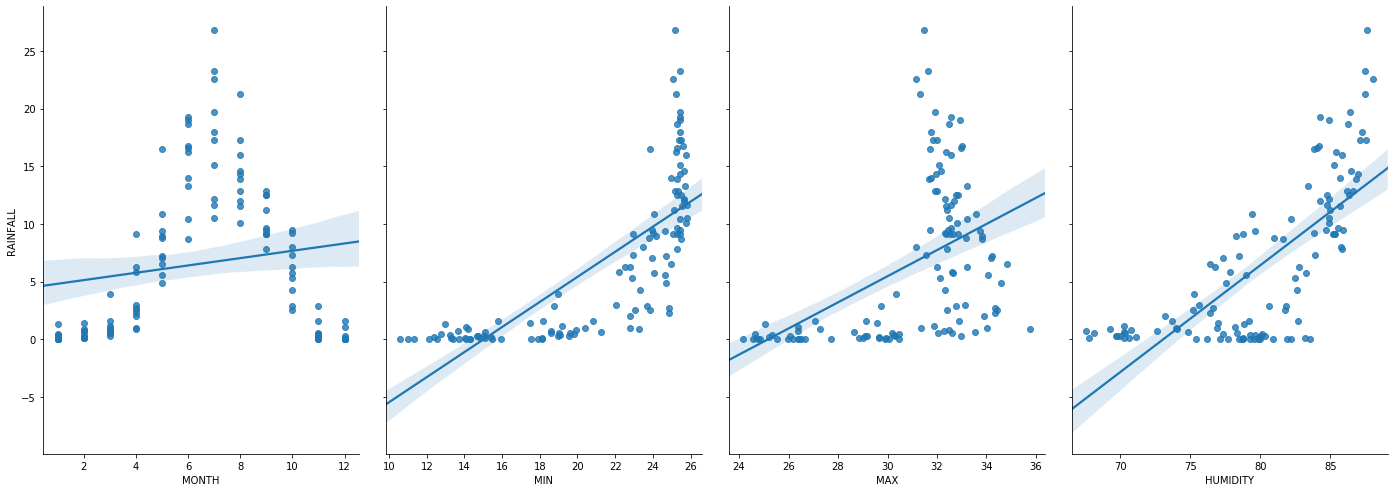

In [21]:
sns.pairplot(df, x_vars=['MONTH','MIN','MAX','HUMIDITY'], y_vars='RAINFALL', size=7, aspect=0.7, kind='reg')

In [0]:
#Defining Features & Label
x = df[['MONTH', 'MIN','MAX','HUMIDITY']]
y = df['RAINFALL']

In [32]:
#Building model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#defining prediction data frame 
predictions = linreg.predict(x_test)

In [43]:
#model performance

print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))


Coefficients: [-0.51874877  2.4638665  -2.53717752  0.09165783]
Intercept: 29.27293562658023
MAE: 2.113388852595553
MSE: 7.030285493478454
RMSE: 2.6514685541183503
AccuracyII: 84.94358444384879 %
R2: 0.8494358444384879


In [0]:
#performance plot
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['RAINFALL'])


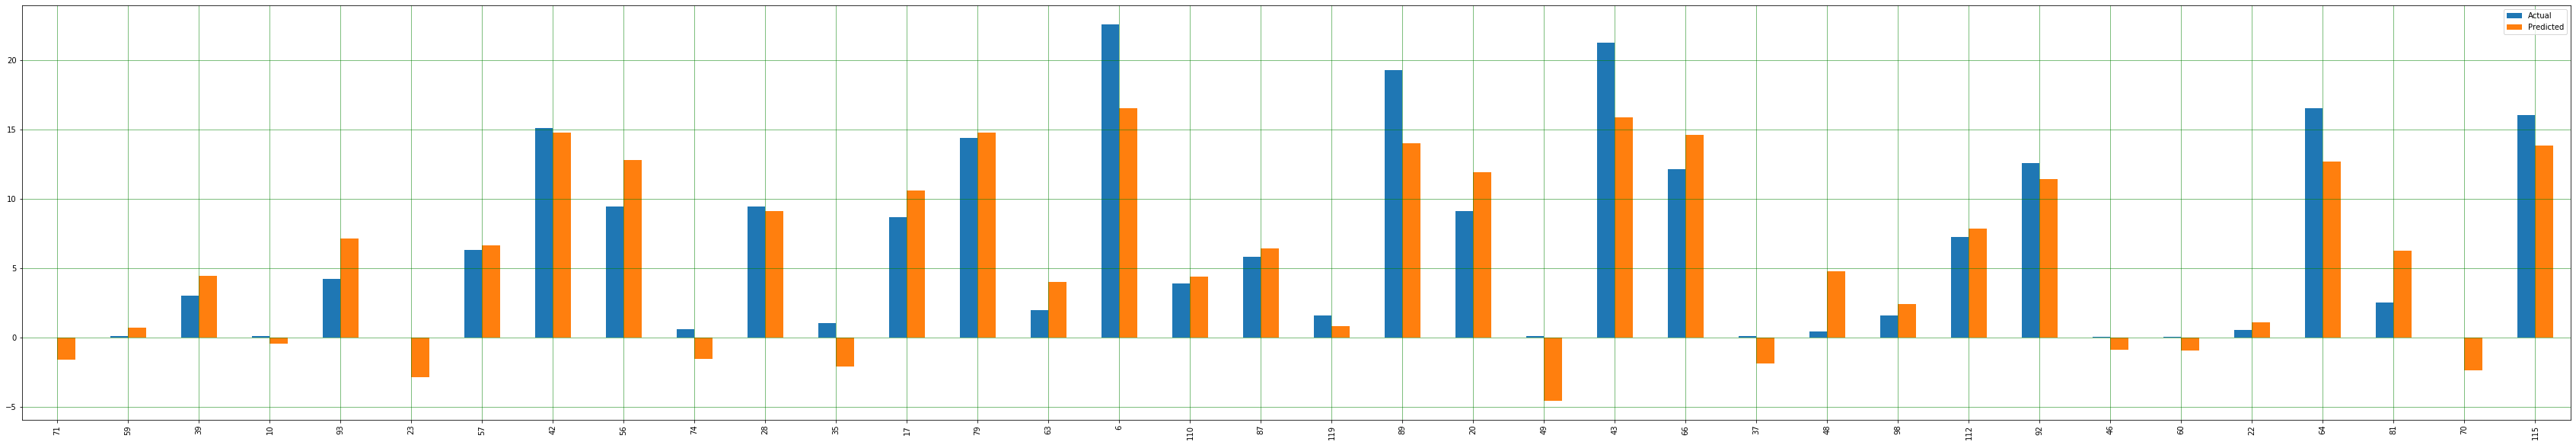

In [26]:
#actual vs predicted data frame
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [28]:
#prediction
new_observation = [[7,26,33,85]]
linreg.predict(new_observation)

array([13.7662808])

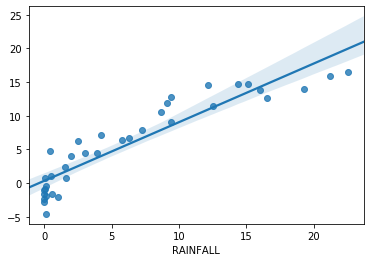

In [30]:
sns.regplot(x=y_test, y=predictions)

# Ploynomial

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=16)
x_ = poly.fit_transform(x)
x_test_ = poly.fit_transform(x_test)

In [0]:
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(x_, y)

# Obtain coefficients
lg.coef_

array([ 1.92784306e-23,  1.54158585e-24,  3.60592058e-25, ...,
       -8.27735441e-21,  1.16495143e-21, -5.97581279e-23])

In [0]:
#defining prediction data frame 
predictions1 = lg.predict(x_test_)

In [0]:
predictions1

array([1.13267902e-02, 7.08492997e-02, 2.99224453e+00, 1.19022176e-01,
       4.23900813e+00, 6.83668381e-05, 6.28248090e+00, 1.50842973e+01,
       9.43998092e+00, 5.81584893e-01, 9.43310294e+00, 1.02278276e+00,
       8.68030879e+00, 1.43625752e+01, 1.97968068e+00, 2.25643966e+01,
       3.90559994e+00, 5.79338384e+00, 1.59281945e+00, 1.92365003e+01,
       9.10797972e+00, 9.35193434e-02, 2.12342067e+01, 1.21364013e+01,
       1.17433496e-01, 4.14403022e-01, 1.57621691e+00, 7.24015032e+00,
       1.25522052e+01, 3.34582481e-02, 1.48301575e-02, 5.37198976e-01,
       1.64911395e+01, 2.50801861e+00, 1.09576884e-02, 1.60100837e+01])

In [0]:
x_

array([[1.00000000e+00, 1.00000000e+00, 1.29939286e+01, ...,
        2.24508602e+29, 7.06192743e+29, 2.22133221e+30],
       [1.00000000e+00, 2.00000000e+00, 1.36582857e+01, ...,
        7.87088071e+28, 2.16593827e+29, 5.96030960e+29],
       [1.00000000e+00, 3.00000000e+00, 2.04112500e+01, ...,
        2.48991895e+29, 6.10448545e+29, 1.49662473e+30],
       ...,
       [1.00000000e+00, 1.00000000e+01, 2.39358036e+01, ...,
        9.84702748e+29, 2.63120448e+30, 7.03078876e+30],
       [1.00000000e+00, 1.10000000e+01, 1.90810138e+01, ...,
        3.52744474e+29, 9.23889206e+29, 2.41980053e+30],
       [1.00000000e+00, 1.20000000e+01, 1.57760714e+01, ...,
        5.13703157e+29, 1.56882475e+30, 4.79111536e+30]])

In [0]:
x_test_

array([[1.00000000e+00, 1.20000000e+01, 1.43167279e+01, ...,
        2.99633397e+29, 9.02655131e+29, 2.71927727e+30],
       [1.00000000e+00, 1.20000000e+01, 1.32735294e+01, ...,
        4.60729163e+29, 1.55158469e+30, 5.22522828e+30],
       [1.00000000e+00, 4.00000000e+00, 2.20592627e+01, ...,
        2.20595442e+29, 5.03686575e+29, 1.15006984e+30],
       ...,
       [1.00000000e+00, 1.00000000e+01, 2.30681250e+01, ...,
        6.28644203e+29, 1.58737960e+30, 4.00826729e+30],
       [1.00000000e+00, 1.10000000e+01, 1.75419355e+01, ...,
        2.64120578e+29, 6.82427210e+29, 1.76323595e+30],
       [1.00000000e+00, 8.00000000e+00, 2.57398214e+01, ...,
        1.24360572e+30, 3.27774780e+30, 8.63909714e+30]])

In [0]:
#model performance
print('Coefficients:', lg.coef_)
print('Intercept:', lg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
accuracy = lg.score(x_test_,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [ 1.92784306e-23  1.54158585e-24  3.60592058e-25 ... -8.27735441e-21
  1.16495143e-21 -5.97581279e-23]
Intercept: 2114.686480105234
MAE: 0.0015593232701116649
MSE: 4.154423412025368e-06
RMSE: 0.0020382402733793107
AccuracyII: 99.99999110267636 %


In [0]:
x_test_1 = poly.fit_transform(x_test)

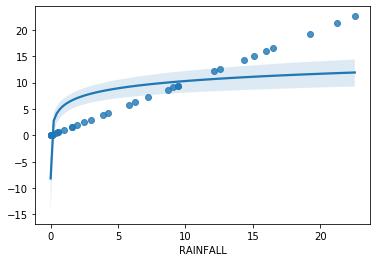

In [0]:
sns.regplot(y_test,predictions1, data=df, logx=True, truncate=True)

In [0]:
new_observation1 = [[7,26,33,85]]


In [0]:
x_test_1 = poly.fit_transform(new_observation1)

In [0]:
lg.predict(x_test_1)

array([20.90286905])

# XGBoost

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='reg:linear',gamma=0,colsample_bytree = .5, learning_rate = 0.1,scale_pos_weight = 1, min_child_weight = 1, max_depth = 3)

In [0]:
xg_reg.fit(x, y)

[16:56:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

[16:56:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.955244


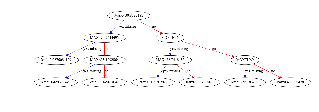

In [0]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=4)
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

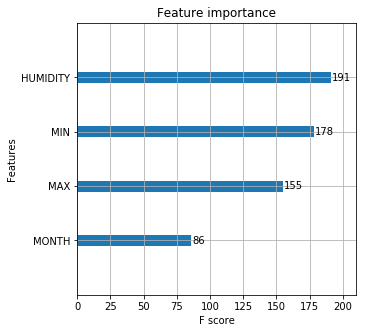

In [0]:

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [0]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test,preds))

0.900083688853891
